# HURRICANE DAMAGE IMAGE CLASSIFICATION

Building a hurricane damage vs. no-damage image classification system using deep learning involves leveraging neural network architectures, particularly Convolutional Neural Networks (CNNs), to automatically learn features from the images and make predictions

Import necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

fetch training set

In [4]:
damage= glob.glob('test_train_val/train_another/damage/*.jpeg')
no_damage = glob.glob('test_train_val/train_another/no_damage/*.jpeg')

fetch testing test

In [5]:
damage_test= glob.glob('test_train_val/test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_train_val/test_another/no_damage/*.jpeg')

Check the Number of images of Damage and NoDamage in Training ,Testing Set

In [6]:
print("Number of images in Training are, Damage:",len(damage),",NoDamage:",len(no_damage))
print("Number of images in Testing are, Damage:",len(damage_test),",NoDamage:",len(no_damage_test))

Number of images in Training are, Damage: 5000 ,NoDamage: 5000
Number of images in Testing are, Damage: 8000 ,NoDamage: 1000


Check the datatype of Training and Testing Set(Both Damage and NoDamage)

In [7]:
print("Datatype of Training set, Damage:", type(damage),",Damage:",type(no_damage))
print("Datatype of Testing set, Damage:", type(damage_test),",NoDamage:",type(no_damage_test))

Datatype of Training set, Damage: <class 'list'> ,Damage: <class 'list'>
Datatype of Testing set, Damage: <class 'list'> ,NoDamage: <class 'list'>


Create a list with the images and a seperate one with its corresponding labels for both training and testing set

Training set

In [8]:
image = []
label = []

for i in damage:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in no_damage:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

In [9]:
image

[array([[[106, 118,  80],
         [ 90, 102,  64],
         [ 80,  92,  54],
         ...,
         [ 54,  82,  60],
         [ 52,  80,  58],
         [ 50,  78,  56]],
 
        [[ 63,  75,  37],
         [ 83,  95,  57],
         [101, 113,  75],
         ...,
         [ 52,  80,  58],
         [ 56,  84,  62],
         [ 57,  85,  63]],
 
        [[ 90, 102,  64],
         [ 90, 102,  64],
         [ 85,  97,  59],
         ...,
         [ 44,  72,  50],
         [ 45,  73,  51],
         [ 42,  70,  48]],
 
        ...,
 
        [[ 43,  71,  46],
         [ 43,  71,  46],
         [ 43,  71,  46],
         ...,
         [ 47,  76,  54],
         [ 41,  70,  48],
         [ 38,  67,  45]],
 
        [[ 45,  73,  48],
         [ 46,  74,  49],
         [ 46,  74,  49],
         ...,
         [ 45,  75,  51],
         [ 44,  74,  50],
         [ 48,  78,  54]],
 
        [[ 38,  66,  41],
         [ 40,  68,  43],
         [ 43,  71,  46],
         ...,
         [ 43,  73,  49],
  

Testing set

In [10]:
damage_test

['test_train_val/test_another/damage\\-93.528502_30.987438.jpeg',
 'test_train_val/test_another/damage\\-93.5302_30.988157.jpeg',
 'test_train_val/test_another/damage\\-93.53950999999999_30.982944.jpeg',
 'test_train_val/test_another/damage\\-93.539521_30.982434.jpeg',
 'test_train_val/test_another/damage\\-93.540151_30.982689.jpeg',
 'test_train_val/test_another/damage\\-93.547871_30.900207.jpeg',
 'test_train_val/test_another/damage\\-93.548123_30.900623.jpeg',
 'test_train_val/test_another/damage\\-93.54819300000001_30.901116.jpeg',
 'test_train_val/test_another/damage\\-93.553566_30.842361999999998.jpeg',
 'test_train_val/test_another/damage\\-93.55919200000001_30.98323.jpeg',
 'test_train_val/test_another/damage\\-93.560128_30.894917.jpeg',
 'test_train_val/test_another/damage\\-93.560702_30.766426.jpeg',
 'test_train_val/test_another/damage\\-93.560879_30.766663.jpeg',
 'test_train_val/test_another/damage\\-93.561578_30.985207.jpeg',
 'test_train_val/test_another/damage\\-93.5672

In [11]:
no_damage_test

['test_train_val/test_another/no_damage\\-95.062321_30.060401000000002.jpeg',
 'test_train_val/test_another/no_damage\\-95.062533_30.055047.jpeg',
 'test_train_val/test_another/no_damage\\-95.062589_29.830265.jpeg',
 'test_train_val/test_another/no_damage\\-95.062638_30.009412.jpeg',
 'test_train_val/test_another/no_damage\\-95.06315699999999_29.831297999999997.jpeg',
 'test_train_val/test_another/no_damage\\-95.06354_30.007773999999998.jpeg',
 'test_train_val/test_another/no_damage\\-95.065175_30.059086999999998.jpeg',
 'test_train_val/test_another/no_damage\\-95.065347_30.041307.jpeg',
 'test_train_val/test_another/no_damage\\-95.06604899999999_29.831622999999997.jpeg',
 'test_train_val/test_another/no_damage\\-95.066202_29.832154.jpeg',
 'test_train_val/test_another/no_damage\\-95.066283_29.792195.jpeg',
 'test_train_val/test_another/no_damage\\-95.066797_29.832078999999997.jpeg',
 'test_train_val/test_another/no_damage\\-95.06698_29.831493.jpeg',
 'test_train_val/test_another/no_da

In [12]:
image_test=[]
label_test=[]

for i in damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in no_damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [13]:
image_test

[array([[[39, 58, 36],
         [39, 58, 36],
         [42, 61, 39],
         ...,
         [40, 64, 40],
         [42, 66, 42],
         [44, 70, 45]],
 
        [[31, 50, 28],
         [33, 52, 30],
         [36, 55, 33],
         ...,
         [44, 68, 42],
         [43, 67, 41],
         [41, 67, 40]],
 
        [[27, 46, 24],
         [29, 48, 26],
         [32, 51, 29],
         ...,
         [48, 72, 46],
         [44, 68, 42],
         [39, 63, 37]],
 
        ...,
 
        [[41, 58, 40],
         [37, 54, 36],
         [32, 49, 31],
         ...,
         [50, 70, 43],
         [48, 68, 41],
         [46, 66, 39]],
 
        [[36, 53, 35],
         [34, 51, 33],
         [32, 49, 31],
         ...,
         [49, 69, 42],
         [48, 68, 41],
         [47, 67, 40]],
 
        [[35, 52, 34],
         [35, 52, 34],
         [36, 53, 35],
         ...,
         [47, 67, 40],
         [47, 67, 40],
         [47, 67, 40]]], dtype=uint8),
 array([[[35, 51, 38],
         [35, 51, 3

Shuffle both images and labels

Training set

In [14]:
image, label = shuffle(image,label, random_state = 100)

Testing set

In [15]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

Plot a few images of Both Categories

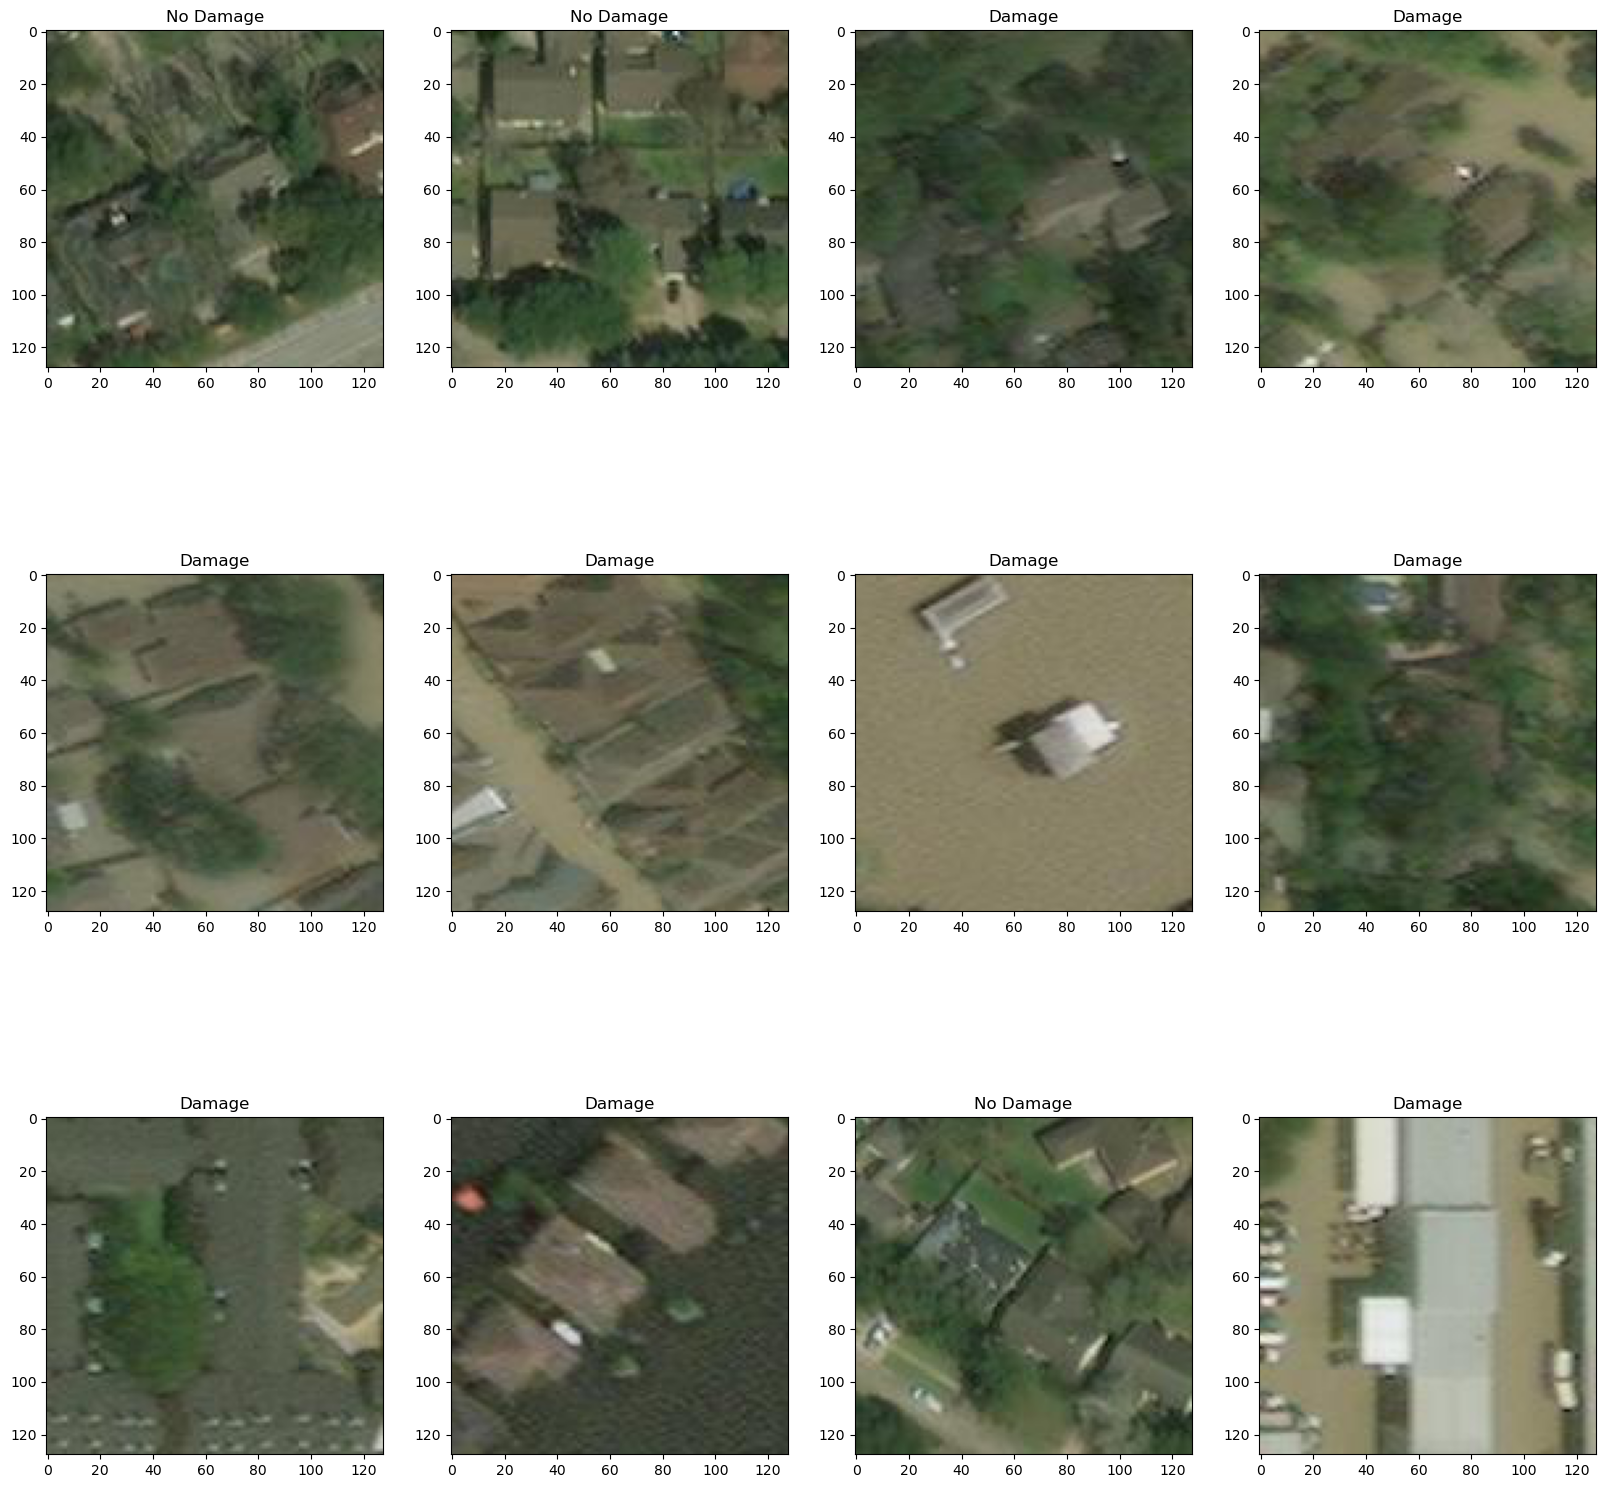

In [16]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

Resize the images to 64X64

Training set

In [17]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

Testing set

In [18]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

Plot some of the resized images

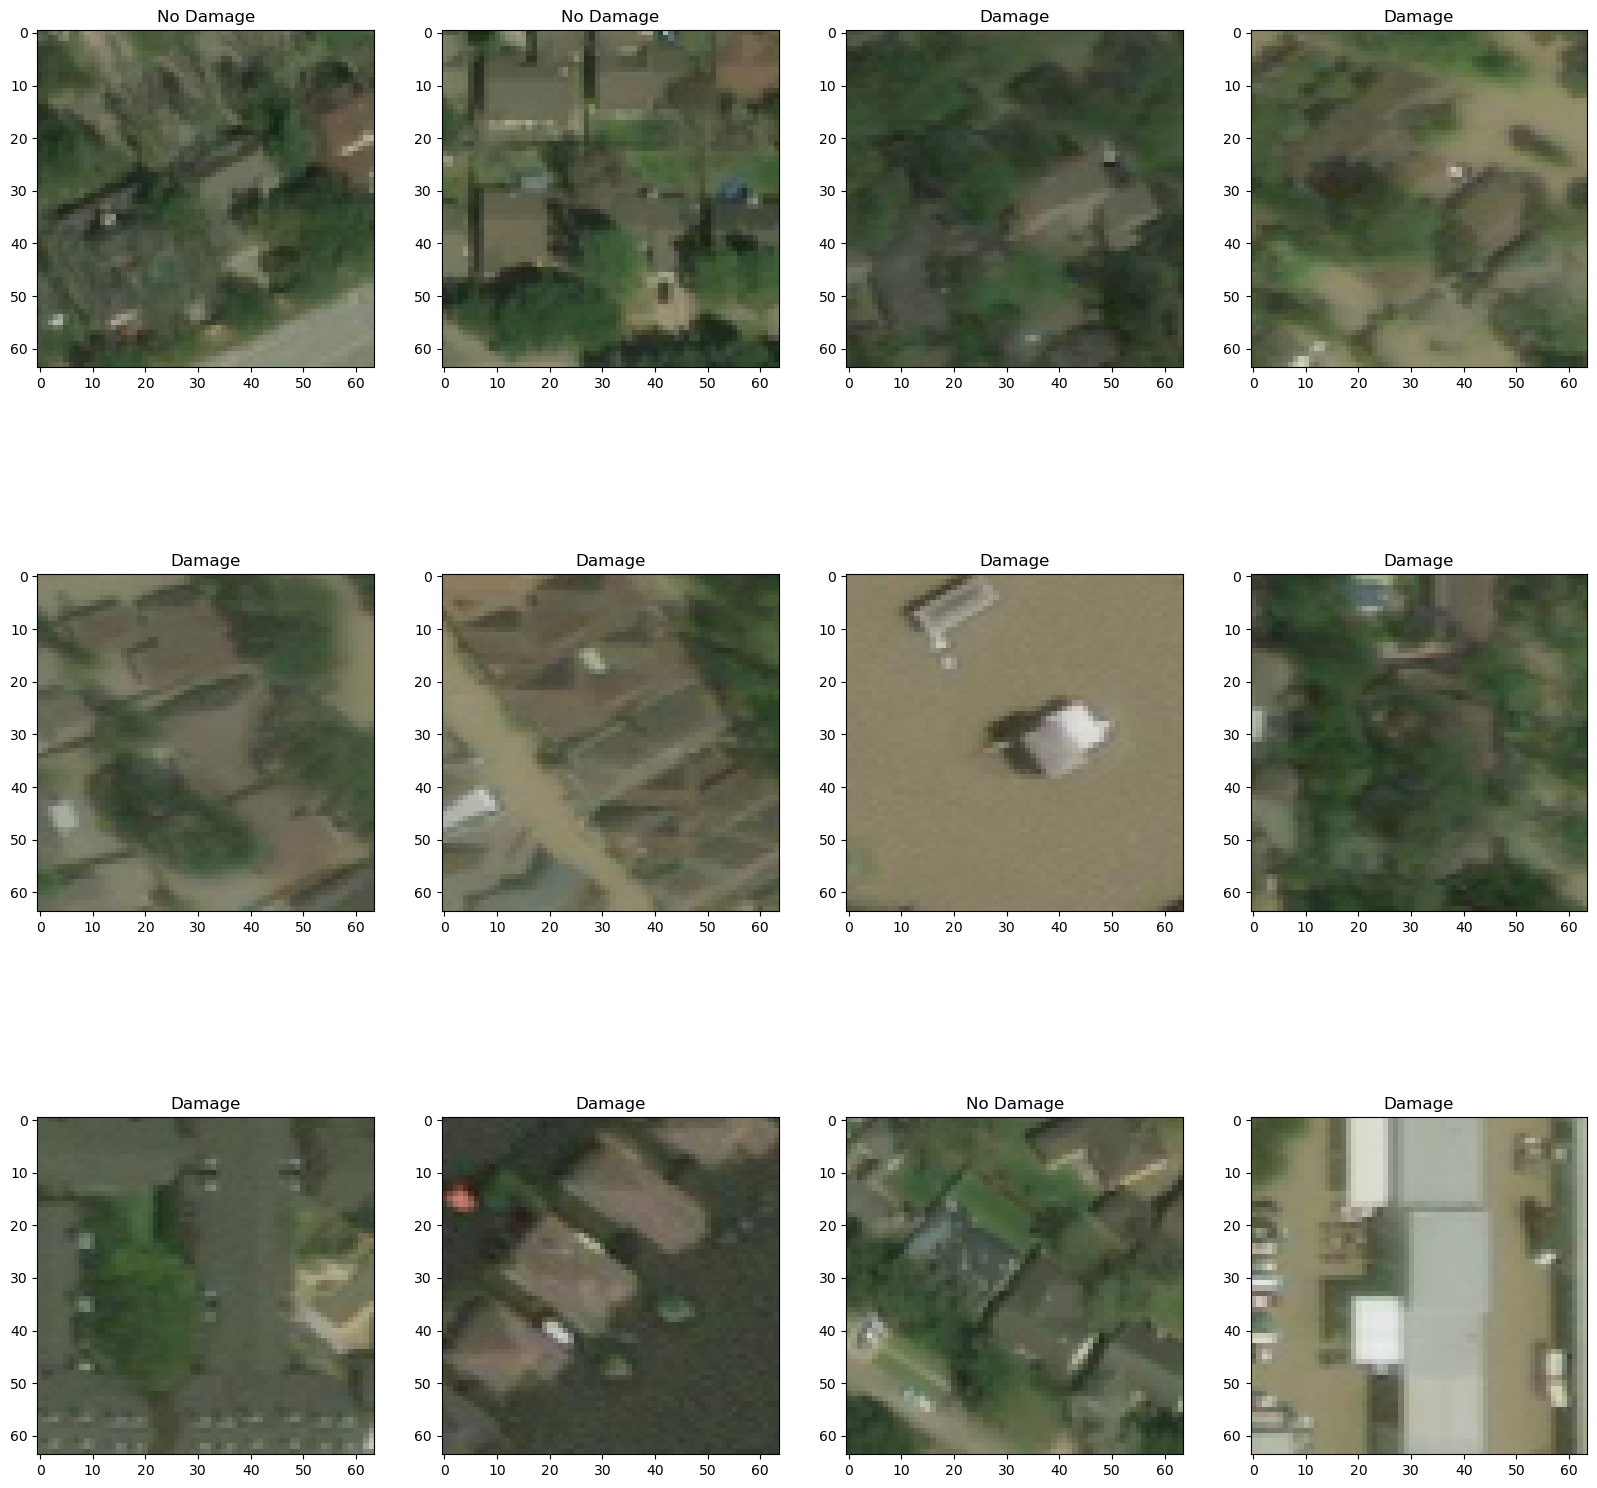

In [19]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

Check the datatype of X_train and Label

In [20]:
print(type(X_train))
print(type(label))

<class 'numpy.ndarray'>
<class 'list'>


Convert label and test_label to Numpy array and store it in y_train and y_test

In [21]:
y_train = np.array(label)
y_test = np.array(label_test)

In [22]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Check the shape of X_train and y_train

In [23]:
X_train.shape

(10000, 64, 64, 3)

In [24]:
y_train.shape

(10000,)

Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

In [31]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

Compile our model

In [32]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Check model summary

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,690 (1.55 MB)

 Trainable params: 406,690 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Train our model with X_train and y_train

In [34]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.6906 - loss: 0.5849 - val_accuracy: 0.8600 - val_loss: 0.3633
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8483 - loss: 0.3708 - val_accuracy: 0.8910 - val_loss: 0.2806
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.8964 - loss: 0.2747 - val_accuracy: 0.9250 - val_loss: 0.1939
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9168 - loss: 0.2149 - val_accuracy: 0.9170 - val_loss: 0.2063
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9250 - loss: 0.1924 - val_accuracy: 0.9130 - val_loss: 0.2182
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9363 - loss: 0.1664 - val_accuracy: 0.9190 - val_loss: 0.1974
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9385 - loss: 0.1504 - val_accuracy: 0.9320 - val_loss: 0.1551
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9392 - loss: 0.1492 - 

Evaluate our model

In [35]:
model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9569 - loss: 0.1090


[0.11438752710819244, 0.9553999900817871]

Make predictions with X_test

In [36]:
prediction = model.predict(X_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [37]:
prediction

array([[0.9836414 , 0.09619831],
       [0.98509514, 0.09959251],
       [0.84983283, 0.43749884],
       ...,
       [0.18360926, 0.97510725],
       [0.9857981 , 0.09514655],
       [0.97976667, 0.11142893]], dtype=float32)

In [39]:
pred=[np.argmax(i) for i in prediction]

In [40]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Plot X_test along with label from our prediction

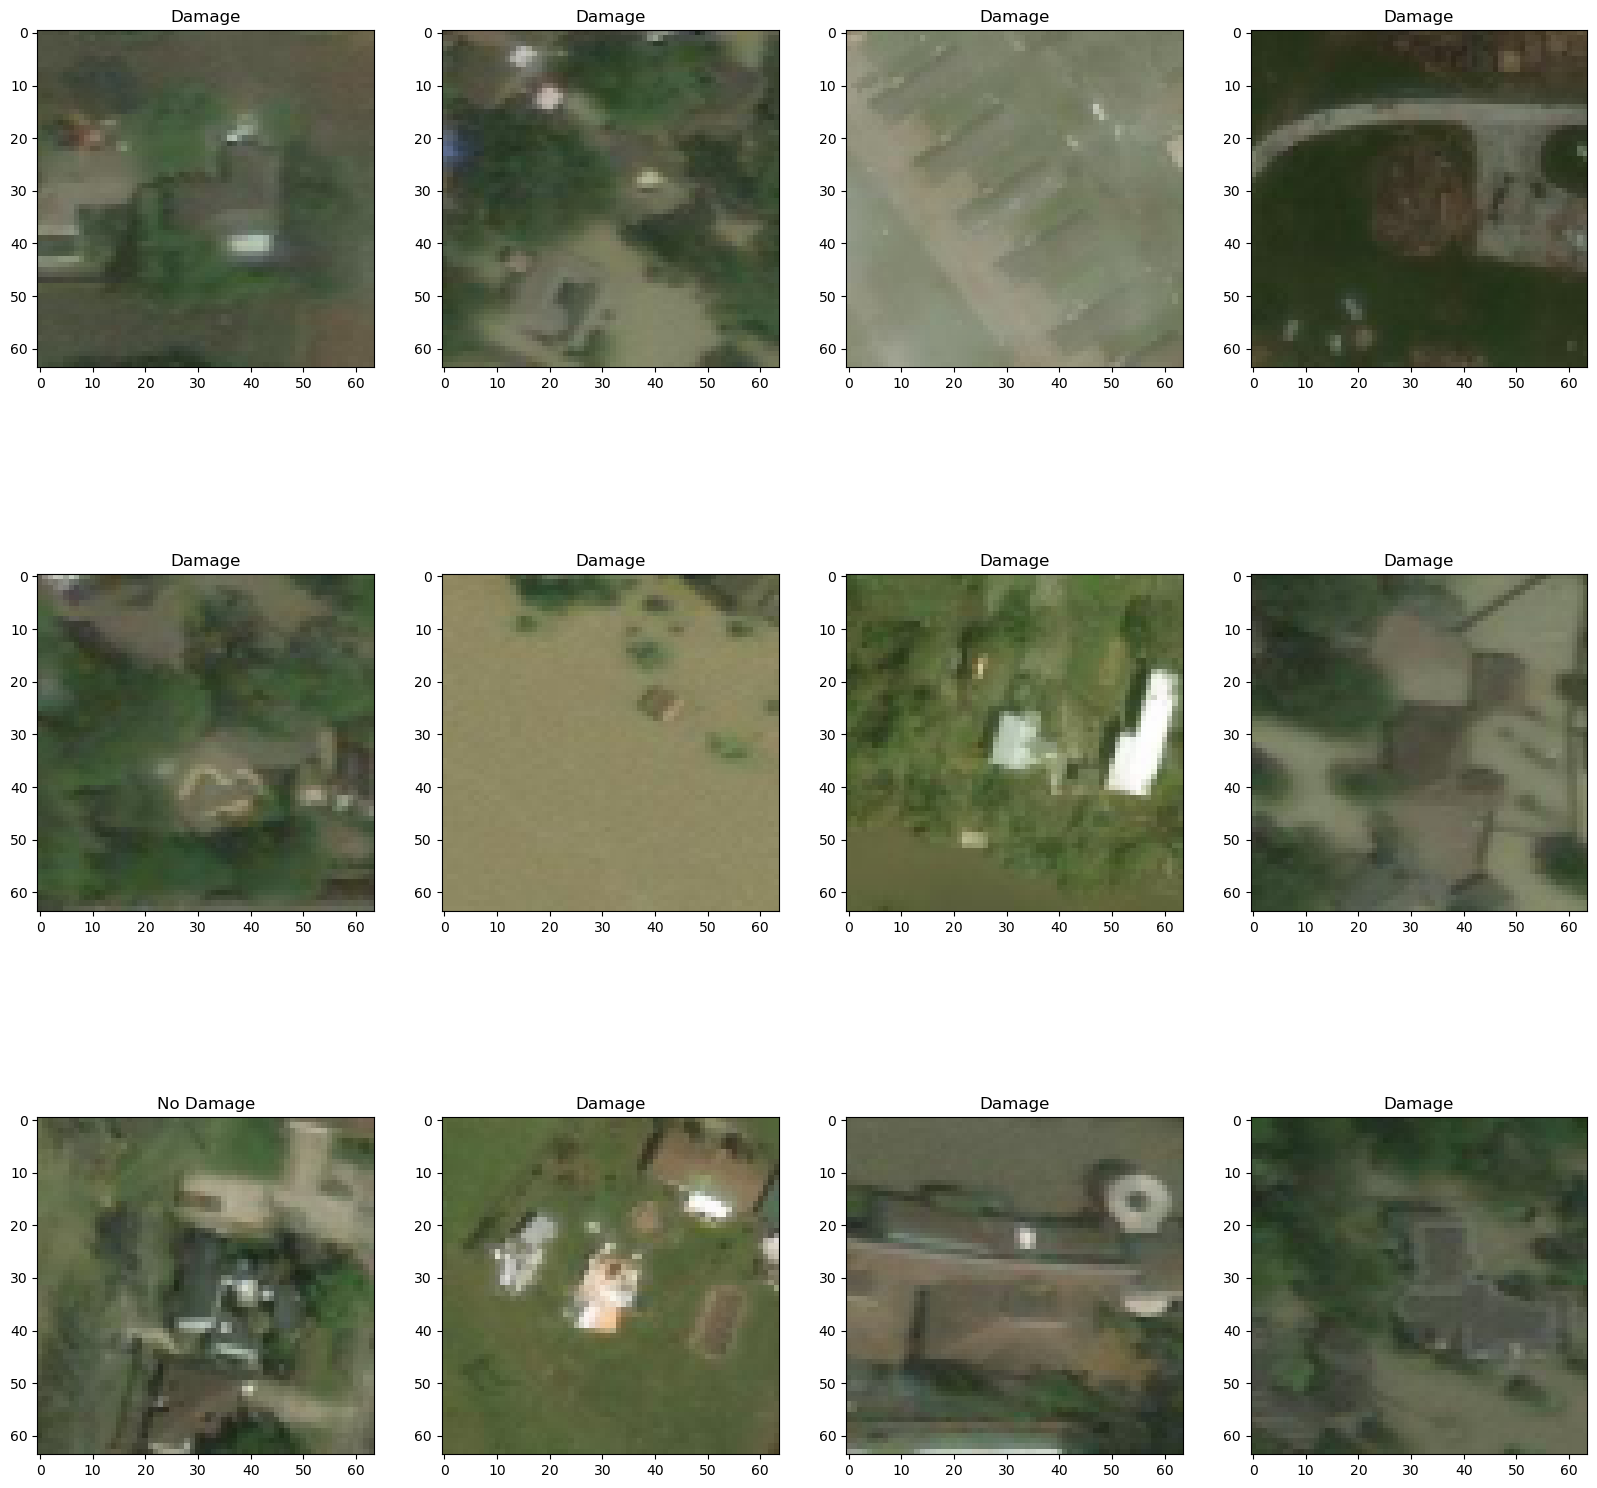

In [41]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('No Damage')
    else:
        plt.title('Damage')

Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score

In [43]:
accuracy_score(y_test,pred)

0.9586666666666667

Plot confusion matrix on a heatmap

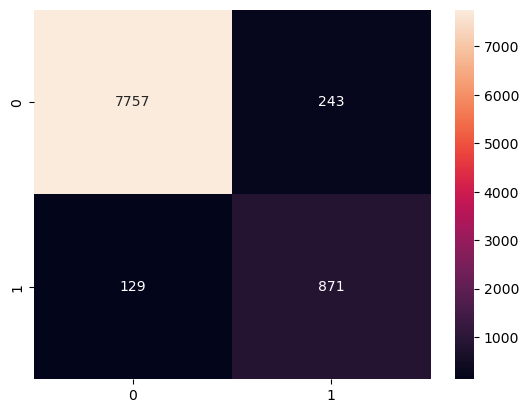

In [44]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')
plt.show()

classification report

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8000
           1       0.78      0.87      0.82      1000

    accuracy                           0.96      9000
   macro avg       0.88      0.92      0.90      9000
weighted avg       0.96      0.96      0.96      9000

